In [ ]:
%pip install datasets

In [ ]:
%pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re

In [ ]:
from datasets import load_dataset
dataset = load_dataset("ucirvine/sms_spam")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/359k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5574 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sms', 'label'],
        num_rows: 5574
    })
})

In [ ]:
dataset.column_names

{'train': ['sms', 'label']}

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sms', 'label'],
        num_rows: 5574
    })
})

In [ ]:
print(dataset['train']['sms'])

Column(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n', 'Ok lar... Joking wif u oni...\n', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n", 'U dun say so early hor... U c already then say...\n', "Nah I don't think he goes to usf, he lives around here though\n"])


In [ ]:
data = dataset['train'].to_pandas() # Converting dataset from huggingface into pandas data frame

In [ ]:
data

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


# **Preprocessing the data**

In [ ]:
data['sms'] = data['sms'].str.lower() # Converting to lowercase

In [ ]:
data['sms'] = data['sms'].str.replace(r"[^a-zA-Z]", " ", regex=True) #Removing special

In [ ]:
# Removing stopwords

# Load English model (download once if not already done: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

def remove_stopwords_spacy(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])

In [ ]:
data["sms"] = data["sms"].apply(remove_stopwords_spacy)

In [ ]:
data["sms"] = data["sms"].str.strip()              # Remove leading/trailing spaces
data["sms"] = data["sms"].str.replace(r"\s+", " ", regex=True)  # Replace multiple spaces with single space

# **Normalization**

In [ ]:
# Function to lemmatize text
def lemmatize_text(text):
    doc = nlp(text)
    # Use lemma for each token
    return " ".join([token.lemma_ for token in doc])

In [ ]:
data["sms"] = data["sms"].apply(lemmatize_text)

In [ ]:
data['sms']

,sms
0,jurong point crazy available bugis n great wor...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun early hor u c
4,nah don t think go usf life
...,...
5569,nd time try contact u u win pound prize claim ...
5570,b go esplanade fr home
5571,pity mood suggestion
5572,guy bitching act like d interested buying week...


# **Feature Representation**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
X = data['sms']
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train

,sms
4977,gorgeous pix cumme thank
650,win cash prize claim t c rstm sw ss ppm
5184,send like
708,late lar ard wun b drivin
3295,beautiful tomorrow come come s today hunt beau...
...,...
3772,hi wlcome wonder get eat lion
5191,ree entry weekly comp chance win ipod txt pod ...
5226,oh fuck juswoke bed boatin dock sleep wid year...
5390,fight good nite


Convert text → TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)

In [ ]:
X_train_tfidf.shape

(3901, 24229)

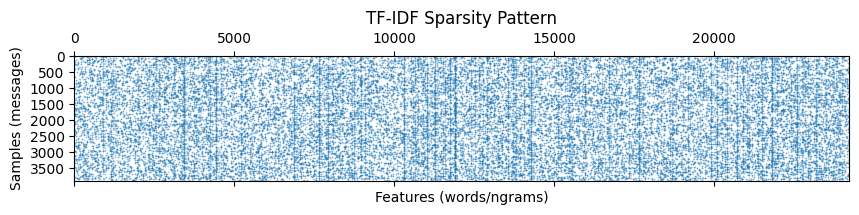

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.spy(X_train_tfidf, markersize=0.1)  # show all samples
plt.title("TF-IDF Sparsity Pattern")
plt.xlabel("Features (words/ngrams)")
plt.ylabel("Samples (messages)")
plt.show()

In [ ]:
print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52316 stored elements and shape (3901, 24229)>
  Coords	Values
  (0, 7777)	0.3776896430583299
  (0, 15313)	0.3508772082587368
  (0, 4152)	0.41089986333079653
  (0, 20234)	0.24265392539573197
  (0, 7780)	0.41089986333079653
  (0, 15314)	0.41089986333079653
  (0, 4153)	0.41089986333079653
  (1, 23192)	0.16333841386371237
  (1, 2648)	0.1872130700879923
  (1, 15949)	0.18849256580838256
  (1, 3127)	0.17786301408852295
  (1, 17132)	0.30721357490613505
  (1, 19627)	0.2926889746813245
  (1, 18967)	0.2926889746813245
  (1, 15766)	0.20468360937452376
  (1, 23199)	0.2533344063698344
  (1, 2668)	0.257553638732776
  (1, 15951)	0.2533344063698344
  (1, 3147)	0.30721357490613505
  (1, 17133)	0.30721357490613505
  (1, 19628)	0.2926889746813245
  (1, 18968)	0.30721357490613505
  (2, 17635)	0.4029673272802305
  (2, 11025)	0.4199363923864984
  (2, 17679)	0.8131855627678349
  :	:
  (3898, 5123)	0.19673535900669264
  (3898, 10121)	0.206498290605

Lets Visualize the Word Cloud

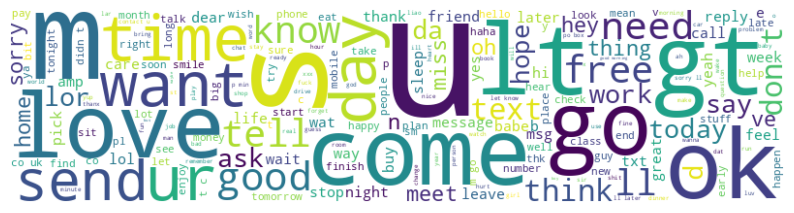

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the SMS messages into a single string
all_sms_text = " ".join(data['sms'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=200, background_color='white').generate(all_sms_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Logestic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
prediction = lr.predict(X_test_tfidf)

In [ ]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
lr.coef_

array([[-0.01371806, -0.01371806, -0.06360125, ...,  0.15574291,
         0.07949895,  0.07949895]])

In [ ]:
import numpy as np

# Get feature names (words/ngrams)
feature_names = vectorizer.get_feature_names_out()

# Coefficients for spam class (LogReg is binary → just one row)
coefs = lr.coef_[0]

# Top 20 spam-indicative words
top_spam = np.argsort(coefs)[-20:]
print("Top spammy words/phrases:")
for i in top_spam:
    print(feature_names[i], "→", coefs[i])

# Top 20 ham-indicative words
top_ham = np.argsort(coefs)[:20]
print("\nTop hammy words/phrases:")
for i in top_ham:
    print(feature_names[i], "→", coefs[i])

# Print intercept
print("\nIntercept:", lr.intercept_)


Top spammy words/phrases:
ringtone → 1.92917328815404
urgent → 1.9457597065031418
com → 2.139267546293094
min → 2.1461536109930406
cash → 2.2272359275179934
award → 2.2384980290457768
prize → 2.588550765745265
new → 2.596102453647165
tone → 2.619287710074263
service → 2.8280722491967154
uk → 2.8911515672186687
reply → 2.981366588258743
stop → 3.100895861958907
www → 3.1547475318744853
text → 3.30613900523186
claim → 3.3648114973391903
win → 3.5435384116106854
mobile → 3.8092523637242555
free → 3.870352133840437
txt → 4.460159218119826

Top hammy words/phrases:
ok → -1.6623557751781108
come → -1.511534877439937
ll → -1.4836295520420812
home → -1.2840001649984407
gt → -1.2838827110253388
lt → -1.2628562188486927
da → -1.1782793242641874
lt gt → -1.149211485156496
lor → -1.1014273366236307
sorry → -1.0842134774816996
later → -1.0083657519872313
love → -1.0077400656732263
tell → -0.9552056748121768
good → -0.953265210421978
oh → -0.9293088950071938
way → -0.9241783691985035
say → -0.878805

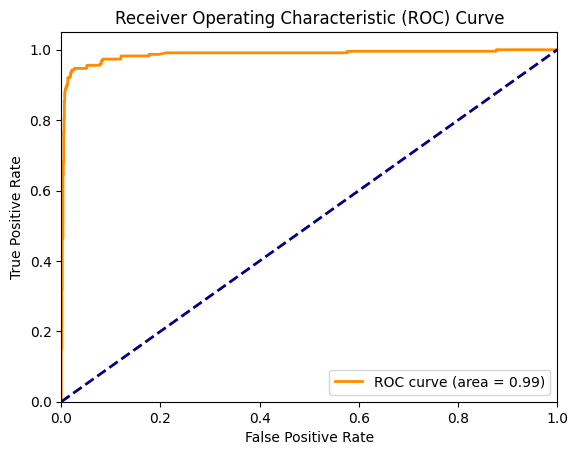

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (spam)
y_prob = lr.predict_proba(X_test_tfidf)[:, 1]

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Transform the single SMS message using the fitted vectorizer
new_sms_tfidf = vectorizer.transform(['Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!'])

# Predict the label for the transformed SMS message
prediction = lr.predict(new_sms_tfidf)

print(prediction)

[0]
